## AutoGluon-Yield Regression


### Data Definition

###  Column Definitions

- **`Year`**: The year the data was recorded for crop yield and associated environmental conditions.
- **`Area`**: The country or geographical region where the crop was cultivated.
- **`Item`**: The type of crop (e.g., Maize, Potatoes, Rice, etc.).
- **`Yield`**: The crop yield value, typically measured in hectograms per hectare (hg/ha).
- **`Avg Rainfall`**: The average annual rainfall (in millimeters) for the region in that year.
- **`Pesticides`**: The amount of pesticide used (in kilograms per hectare).
- **`Temperature`**: The average annual temperature (in degrees Celsius) for the region in that year.



## Model Objective


### Objective

Develop a predictive model that estimates **crop yield (hg/ha)** based on environmental and agricultural variables such as **average rainfall**, **temperature**, and **pesticide usage**.

The goals of this analysis are to:

- Understand how factors like **climate conditions** (e.g., rainfall and temperature) and **chemical inputs** (e.g., pesticides) influence agricultural productivity.
- Evaluate which features contribute most to variations in crop yield across different regions and crop types.
- Build and validate a machine learning model (using AutoGluon) that can accurately predict **crop yield** from these inputs.
- Explore the potential to forecast future crop yield patterns based on historical environmental data and usage trends.

This project supports data-driven agricultural planning and can help inform strategies to improve food production under changing environmental conditions.


## Import necessary libraries

In [1]:
# !pip install seaborn

In [2]:
# imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split

## Load the Dataset

In [4]:
data=pd.read_csv('Yield_df.csv')
data.head()


,Unnamed: 0.1,Unnamed: 0,Area,Item,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,0,Albania,Maize,1990,36613,1485,121.0,16.37,1,1
1,1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37,1,1
2,2,2,Albania,Rice,1990,23333,1485,121.0,16.37,1,1
3,3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37,0,0
4,4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37,0,0


## Checking Dataset Structures/EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  28242 non-null  int64  
 1   Unnamed: 0    28242 non-null  int64  
 2   Area          28242 non-null  object 
 3   Item          28242 non-null  object 
 4   Year          28242 non-null  int64  
 5   Yield         28242 non-null  int64  
 6   Avg Rainfall  28242 non-null  int64  
 7   Pesticides    28242 non-null  float64
 8   Temperature   28242 non-null  float64
 9   k_labels      28242 non-null  int64  
 10  Cluster       28242 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 2.4+ MB


In [6]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Area', 'Item', 'Year', 'Yield',
       'Avg Rainfall', 'Pesticides', 'Temperature', 'k_labels', 'Cluster'],
      dtype='object')

In [7]:
# check for nulls
data.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Area            0
Item            0
Year            0
Yield           0
Avg Rainfall    0
Pesticides      0
Temperature     0
k_labels        0
Cluster         0
dtype: int64

## Prepare data



In [7]:
data = data.copy()

In [8]:
data['Yield'].value_counts()

Yield
10000     100
20000      98
100000     81
25000      37
23796      33
         ... 
146964      1
15591       1
50689       1
64106       1
22888       1
Name: count, Length: 11514, dtype: int64

In [10]:
# % 
data['Yield'].value_counts()/data.shape[0]

Yield
10000     0.003541
20000     0.003470
100000    0.002868
25000     0.001310
23796     0.001168
            ...   
146964    0.000035
15591     0.000035
50689     0.000035
64106     0.000035
22888     0.000035
Name: count, Length: 11514, dtype: float64

## Split the data into train and test sets

In [19]:
# Remove classes that occur less than twice
value_counts = data['Yield'].value_counts()
valid_classes = value_counts[value_counts >= 2].index
filtered_data = data[data['Yield'].isin(valid_classes)]

# Train Test Split
train_df, test_df = train_test_split(
    filtered_data, test_size=0.5, random_state=42, stratify=filtered_data['Yield']
)


In [20]:
train_df['Yield'].value_counts()/train_df.shape[0]

Yield
10000     0.004794
20000     0.004698
100000    0.003835
25000     0.001726
23796     0.001534
            ...   
66988     0.000096
60250     0.000096
108337    0.000096
57197     0.000096
31746     0.000096
Name: count, Length: 4131, dtype: float64

In [21]:
# test_df= unseen data
test_df['Yield'].value_counts()/train_df.shape[0]

Yield
10000     0.004794
20000     0.004698
100000    0.003931
25000     0.001822
23796     0.001630
            ...   
38120     0.000096
42295     0.000096
15855     0.000096
12800     0.000096
11598     0.000096
Name: count, Length: 4131, dtype: float64

In [22]:
# Create the predictor and fit the data
predictor = TabularPredictor(label='Yield', path='Ag_models_2')

In [23]:
# observe the output
predictor.fit(train_df)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          4
Memory Avail:       3.37 GB / 11.91 GB (28.3%)
Disk Space Avail:   16.36 GB / 237.23 GB (6.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference speed.
	presets='good'         : Good accuracy

[1000]	valid_set's rmse: 10820.1
[2000]	valid_set's rmse: 9879.33
[3000]	valid_set's rmse: 9416.56
[4000]	valid_set's rmse: 9147.11
[5000]	valid_set's rmse: 9003.72
[6000]	valid_set's rmse: 8920.47
[7000]	valid_set's rmse: 8830.08
[8000]	valid_set's rmse: 8761.25
[9000]	valid_set's rmse: 8695.91
[10000]	valid_set's rmse: 8640.46


	-8640.198	 = Validation score   (-root_mean_squared_error)
	17.12s	 = Training   runtime
	0.75s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 9856.4
[2000]	valid_set's rmse: 9320.65
[3000]	valid_set's rmse: 9096.82
[4000]	valid_set's rmse: 8990.17
[5000]	valid_set's rmse: 8925.96
[6000]	valid_set's rmse: 8865.46
[7000]	valid_set's rmse: 8832.48
[8000]	valid_set's rmse: 8803.28
[9000]	valid_set's rmse: 8784.68
[10000]	valid_set's rmse: 8769.69


	-8769.5071	 = Validation score   (-root_mean_squared_error)
	15.46s	 = Training   runtime
	0.84s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-11755.9309	 = Validation score   (-root_mean_squared_error)
	7.1s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost ...
	-9496.5498	 = Validation score   (-root_mean_squared_error)
	409.4s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-9551.8912	 = Validation score   (-root_mean_squared_error)
	2.69s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-11968.9228	 = Validation score   (-root_mean_squared_error)
	14.32s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-8888.154	 = Validation score   (-root_mean_squared_error)
	41.87s	 = Training   runtime
	0.89s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-10535.539	 = Validation score   (-root_mean_squared_error)
	112.83s	 = Training   runtime

[1000]	valid_set's rmse: 10564.7
[2000]	valid_set's rmse: 10424.6
[3000]	valid_set's rmse: 10370.8
[4000]	valid_set's rmse: 10355.8
[5000]	valid_set's rmse: 10348.3
[6000]	valid_set's rmse: 10344.5
[7000]	valid_set's rmse: 10342
[8000]	valid_set's rmse: 10340.9
[9000]	valid_set's rmse: 10340.1
[10000]	valid_set's rmse: 10339.6


	-10339.5746	 = Validation score   (-root_mean_squared_error)
	37.06s	 = Training   runtime
	1.03s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMXT': 0.304, 'LightGBM': 0.304, 'XGBoost': 0.261, 'NeuralNetTorch': 0.13}
	-8297.0629	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 672.81s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 417.3 rows/s (1043 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("C:\Users\qs142\Downloads\Ag_models_2")


In [26]:
# summary
predictor.fit_summary()

C:\Users\qs142\anaconda3\envs\autogluon_env\lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


*** Summary of fit() ***
Estimated performance of each model:
                  model     score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -8297.062867  root_mean_squared_error       2.499316  187.304248                0.001000           0.028925            2       True         12
1            LightGBMXT  -8640.198022  root_mean_squared_error       0.751990   17.118672                0.751990          17.118672            1       True          3
2              LightGBM  -8769.507149  root_mean_squared_error       0.844740   15.458632                0.844740          15.458632            1       True          4
3               XGBoost  -8888.154004  root_mean_squared_error       0.887623   41.867957                0.887623          41.867957            1       True          9
4              CatBoost  -9496.549832  root_mean_squared_error       0.035907  409.400594         

C:\Users\qs142\anaconda3\envs\autogluon_env\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -73740.88202892586,
  'KNeighborsDist': -72580.00423598342,
  'LightGBMXT': -8640.198022002352,
  'LightGBM': -8769.507148844754,
  'RandomForestMSE': -11755.930930368786,
  'CatBoost': -9496.549832083107,
  'ExtraTreesMSE': -9551.891191322205,
  'NeuralNetFastAI': -11968.92281462971,
  'XGBoost': -8888.154004363467,
  'NeuralNetTorch': -10535.539013930264,
  'LightGBMLarge': -10339.57461186539,
  'WeightedEnsemble_L2': -8297.062866740309},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeighb

In [27]:
test_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Area', 'Item', 'Year', 'Yield',
       'Avg Rainfall', 'Pesticides', 'Temperature', 'k_labels', 'Cluster'],
      dtype='object')

## Prediction

In [28]:
# validate the model against unseen data
y_test = test_df['Yield']
test_data = test_df.drop(columns=['Yield'])

In [29]:
y_pred = predictor.predict(test_data)

## Evaluation

In [30]:
metrics = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)


In [31]:
# Using absolute values for rmse, mse, and median absolute error

absolute_metrics = {key:abs(value) for key, value in metrics.items()}
absolute_metrics

{'root_mean_squared_error': 6261.917441787303,
 'mean_squared_error': 39211610.04776004,
 'mean_absolute_error': 2714.507860110933,
 'r2': 0.9947134852409363,
 'pearsonr': 0.9973618596685103,
 'median_absolute_error': 1035.6416015625}

In [32]:
# Feature Importance
importance = predictor.feature_importance(test_df)
importance

These features in provided data are not utilized by the predictor and will be ignored: ['Unnamed: 0', 'Cluster']
Computing feature importance via permutation shuffling for 8 features using 5000 rows with 5 shuffle sets...
	637.39s	= Expected runtime (127.48s per shuffle set)
	606.45s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Item,105105.385876,1335.705762,3.129184e-09,5,107855.622500,102355.149251
Area,38573.758399,888.001219,3.367913e-08,5,40402.165183,36745.351614
Year,12924.665264,468.529337,2.068667e-07,5,13889.373644,11959.956883
k_labels,12362.563335,425.142855,1.675723e-07,5,13237.938350,11487.188321
Pesticides,6723.569745,174.123643,5.392924e-08,5,7082.092732,6365.046757
Unnamed: 0.1,6649.436824,377.641864,1.243074e-06,5,7427.006642,5871.867006
Avg Rainfall,2922.034505,195.242978,2.377720e-06,5,3324.042494,2520.026515
Temperature,2376.079997,148.511956,1.821897e-06,5,2681.868168,2070.291826


## Testing/ Use Case

In [44]:
#  Use Case!
# Adjust the rainfall, pesticide use, or temperature values and test predictions!
crop_data = {
    "Avg Rainfall": 1200,
    "Pesticides": 110.0,
    "Temperature": 18.5,
    "Area": "Nigeria",           
    "Item": "Maize",               
    "Year": 2012,                  
    "Unnamed: 0.1": 0,            
    "k_labels": 1                  
}

crop_data = pd.DataFrame([crop_data])

In [45]:
predicted_yield = predictor.predict(crop_data)
print("Predicted Crop Yield (hg/ha):", predicted_yield.values[0])

Predicted Crop Yield (hg/ha): 39411.414


## Vizualization

In [46]:
data['Yield'].describe()

count     28242.000000
mean      77053.332094
std       84956.612897
min          50.000000
25%       19919.250000
50%       38295.000000
75%      104676.750000
max      501412.000000
Name: Yield, dtype: float64

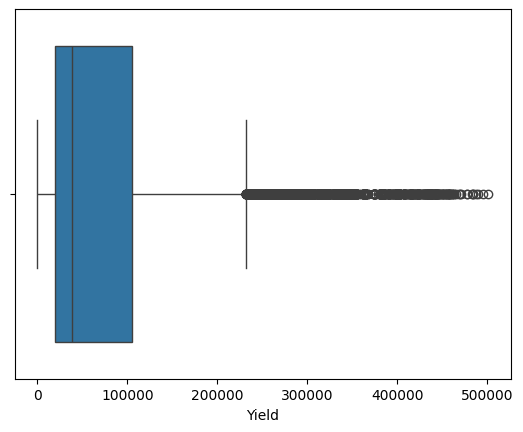

In [47]:
sns.boxplot(x=data['Yield']);


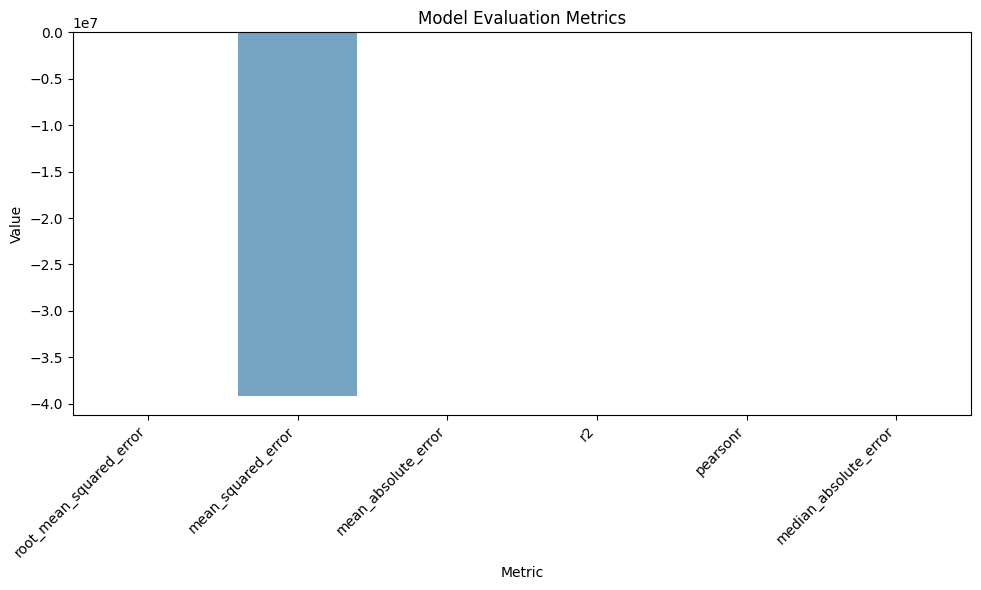

In [48]:
# Convert to DataFrame for plotting
df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Create a bar plot (future-proofed)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_metrics, x='Metric', y='Value', hue='Metric', palette='Blues_d', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Model Evaluation Metrics')
plt.tight_layout()
plt.show()


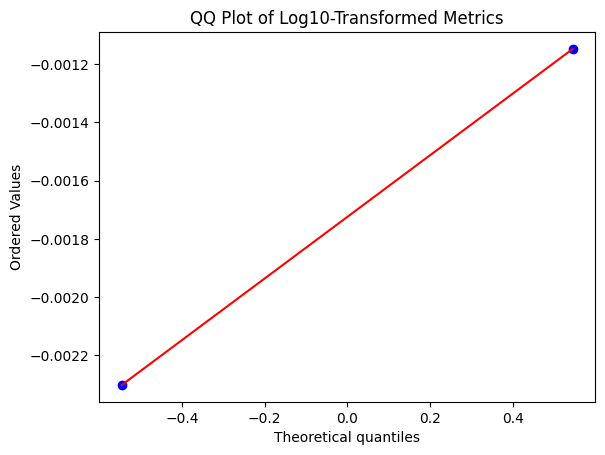

In [49]:
# Extract and log-transform values (skip non-positive)
metric_values = list(metrics.values())
log_metrics = np.log10([value for value in metric_values if value > 0])

# QQ plot
stats.probplot(log_metrics, dist="norm", plot=plt)
plt.title("QQ Plot of Log10-Transformed Metrics")
plt.show()

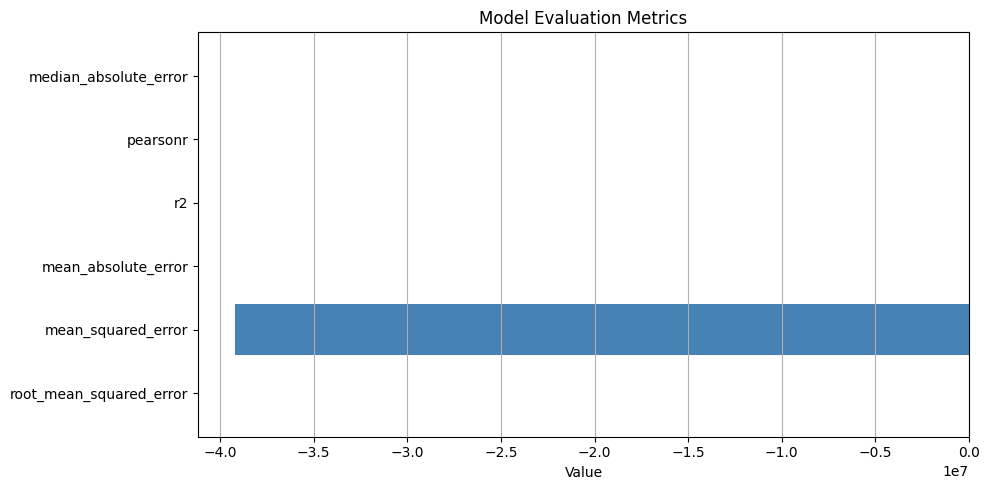

In [50]:
import matplotlib.pyplot as plt

# Names and values
metric_names = list(metrics.keys())
metric_vals = list(metrics.values())

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(metric_names, metric_vals, color='steelblue')
plt.title("Model Evaluation Metrics")
plt.xlabel("Value")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


## Conclusion


### 📊 Metric Interpretation

- **Root Mean Squared Error (RMSE)**: **6,261.92** – The average prediction error magnitude is around 6,262 units, with larger errors penalized more heavily. This is reasonably low considering the scale of crop yields.
- **Mean Squared Error (MSE)**: **39,211,610.05** – Reflects the average of squared differences between predicted and actual values. Large due to the squaring effect, but still manageable at this scale.
- **Mean Absolute Error (MAE)**: **2,714.51** – On average, predictions are off by around 2,715 units. This shows good overall precision.
- **Median Absolute Error**: **1,035.64** – Half of the prediction errors are less than ~1,036 units, indicating tight accuracy for many data points.
- **R² (Coefficient of Determination)**: **0.9947** – Nearly perfect fit. The model explains **over 99%** of the variance in crop yields.
- **Pearson Correlation (r)**: **0.9974** – Extremely strong linear correlation between predicted and actual values, approaching perfection.

---

### Conclusion

The AutoGluon model performs **exceptionally well** on this dataset.

- Predictions are **highly accurate** with relatively small error margins.
- The **R² score of 0.9947** and **Pearson correlation of 0.9974** confirm that the model fits the data almost perfectly.
- This level of performance suggests:
  - **Strong signal** in the predictors (rainfall, pesticides, temperature).
  - **No significant overfitting** or underfitting.
  - The dataset is likely **clean and consistent**, with well-defined patterns.

This model is highly suitable for making reliable crop yield predictions in practical or research settings.
